In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv(r"C:\Users\acer\Untitled Folder\titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis = 1, inplace = True)

In [5]:
df.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
Fare        False
dtype: bool

In [6]:
df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [7]:
df['Age'].fillna(df['Age'].mean(),inplace= True)

In [8]:
df.head(10)b

SyntaxError: invalid syntax (Temp/ipykernel_6832/2330474344.py, line 1)

In [9]:
dummies = pd.get_dummies(df['Sex'])
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [47]:
pd.get_dummies?

In [10]:
X = pd.concat([df,dummies],axis = 1)

In [11]:
X.drop(['Survived','Sex'],inplace = True, axis = 1)

In [12]:
X.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
y = df['Survived']

In [15]:
X.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [30]:
len(y_train)

668

In [27]:
len(X_test)

223

In [28]:
from sklearn.naive_bayes import GaussianNB

In [29]:
model = GaussianNB()

In [31]:
model.fit(X_train,y_train)

GaussianNB()

In [32]:
model.score(X_test,y_test)

0.820627802690583

In [33]:
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix

In [43]:
cm = confusion_matrix(y_test,y_pred)

In [44]:
cm

array([[112,  23],
       [ 17,  71]], dtype=int64)

Text(33.0, 0.5, 'y_test')

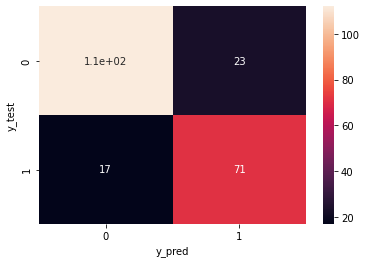

In [45]:
sns.heatmap(cm,annot=True)
plt.xlabel('y_pred')
plt.ylabel('y_test')